In [66]:
import requests
import pandas as pd
import json
import os

with open('mbta_api_key.txt') as file:
    API_KEY = file.read()


def get_vehicles(route_id):
    url = 'https://api-v3.mbta.com/vehicles'
    params = {
        'api_key': API_KEY,
        'include': 'trip',
        'filter[route]': route_id,
    }

    response = requests.get(url, params=params)
    if response.status_code == 200:
        data = response.json()
        return data
    else:
        print(f"Error: {response.status_code}")
        return None

def get_trips(route_id):
    url = 'https://api-v3.mbta.com/trips'
    params = {
        'api_key': API_KEY,
        'filter[route]': route_id,
    }

    response = requests.get(url, params=params)
    if response.status_code == 200:
        data = response.json()
        return data
    else:
        print(f"Error: {response.status_code}")
        return None
    
def get_schedules(route_id):
    url = 'https://api-v3.mbta.com/schedules'
    params = {
        'api_key': API_KEY,
        'filter[route]': route_id,
    }

    response = requests.get(url, params=params)
    if response.status_code == 200:
        data = response.json()
        return data
    else:
        print(f"Error: {response.status_code}")
        return None
    
def get_services(route_id):
    url = 'https://api-v3.mbta.com/services'
    params = {
        'api_key': API_KEY,
        'filter[route]': route_id,
    }

    response = requests.get(url, params=params)
    if response.status_code == 200:
        data = response.json()
        return data
    else:
        print(f"Error: {response.status_code}")
        return None
    
def get_stops(route_id):
    url = 'https://api-v3.mbta.com/stops'
    params = {
        'api_key': API_KEY,
        'filter[route]': route_id,
    }

    response = requests.get(url, params=params)
    if response.status_code == 200:
        data = response.json()
        return data
    else:
        print(f"Error: {response.status_code}")
        return None
    

In [26]:
route_id = 'Red'
vehicle_data = get_vehicles(route_id)
trip_data = get_trips(route_id)

In [27]:
vehicle_data['data'][0]

{'attributes': {'bearing': 170,
  'carriages': [{'label': '1810',
    'occupancy_percentage': None,
    'occupancy_status': 'NO_DATA_AVAILABLE'},
   {'label': '1811',
    'occupancy_percentage': None,
    'occupancy_status': 'NO_DATA_AVAILABLE'},
   {'label': '1839',
    'occupancy_percentage': None,
    'occupancy_status': 'NO_DATA_AVAILABLE'},
   {'label': '1838',
    'occupancy_percentage': None,
    'occupancy_status': 'NO_DATA_AVAILABLE'},
   {'label': '1863',
    'occupancy_percentage': None,
    'occupancy_status': 'NO_DATA_AVAILABLE'},
   {'label': '1862',
    'occupancy_percentage': None,
    'occupancy_status': 'NO_DATA_AVAILABLE'}],
  'current_status': 'IN_TRANSIT_TO',
  'current_stop_sequence': 140,
  'direction_id': 0,
  'label': '1810',
  'latitude': 42.31872,
  'longitude': -71.0523,
  'occupancy_status': None,
  'revenue': 'REVENUE',
  'speed': None,
  'updated_at': '2024-06-08T12:47:42-04:00'},
 'id': 'R-547CC0EE',
 'links': {'self': '/vehicles/R-547CC0EE'},
 'relation

In [28]:
trip_data['data'][0]

{'attributes': {'bikes_allowed': 0,
  'block_id': 'S931_-1',
  'direction_id': 0,
  'headsign': 'Ashmont',
  'name': '',
  'revenue': 'REVENUE',
  'wheelchair_accessible': 1},
 'id': '61319023',
 'links': {'self': '/trips/61319023'},
 'relationships': {'route': {'data': {'id': 'Red', 'type': 'route'}},
  'route_pattern': {'data': {'id': 'Red-1-0', 'type': 'route_pattern'}},
  'service': {'data': {'id': 'SpringWeekday', 'type': 'service'}},
  'shape': {'data': {'id': '931_0009', 'type': 'shape'}}},
 'type': 'trip'}

In [29]:
df = pd.json_normalize(vehicle_data['data'])

In [30]:
df.head()

,id,type,attributes.bearing,attributes.carriages,attributes.current_status,attributes.current_stop_sequence,attributes.direction_id,attributes.label,attributes.latitude,attributes.longitude,...,attributes.revenue,attributes.speed,attributes.updated_at,links.self,relationships.route.data.id,relationships.route.data.type,relationships.stop.data.id,relationships.stop.data.type,relationships.trip.data.id,relationships.trip.data.type
0,R-547CC0EE,vehicle,170,"[{'label': '1810', 'occupancy_percentage': Non...",IN_TRANSIT_TO,140,0,1810,42.31872,-71.05230,...,REVENUE,None,2024-06-08T12:47:42-04:00,/vehicles/R-547CC0EE,Red,route,70087,stop,ADDED-1581937698,trip
1,R-547CC0E0,vehicle,150,"[{'label': '1516', 'occupancy_percentage': 9, ...",STOPPED_AT,170,0,1516,42.28456,-71.06382,...,REVENUE,None,2024-06-08T12:47:49-04:00,/vehicles/R-547CC0E0,Red,route,70093,stop,ADDED-1581937686,trip
2,R-547CC0D8,vehicle,85,"[{'label': '1841', 'occupancy_percentage': Non...",IN_TRANSIT_TO,80,1,1841,42.30028,-71.05982,...,REVENUE,None,2024-06-08T12:47:57-04:00,/vehicles/R-547CC0D8,Red,route,70088,stop,ADDED-1581937658,trip
3,R-547CBFEF,vehicle,95,"[{'label': '1823', 'occupancy_percentage': Non...",INCOMING_AT,60,0,1823,42.36228,-71.08379,...,REVENUE,None,2024-06-08T12:48:10-04:00,/vehicles/R-547CBFEF,Red,route,70073,stop,ADDED-1581937635,trip
4,R-547CBFA0,vehicle,135,"[{'label': '1873', 'occupancy_percentage': Non...",IN_TRANSIT_TO,20,0,1873,42.39590,-71.12199,...,REVENUE,None,2024-06-08T12:48:21-04:00,/vehicles/R-547CBFA0,Red,route,70065,stop,ADDED-1581937647,trip


In [31]:
df[df['attributes.current_status']=='STOPPED_AT']['relationships.stop.data.id']

1         70093
6    Alewife-02
9         70082
Name: relationships.stop.data.id, dtype: object

In [36]:
get_services(route_id)

{'data': [{'attributes': {'added_dates': ['2024-06-29'],
    'added_dates_notes': [None],
    'description': 'Saturday schedule (modified service)',
    'end_date': '2024-06-01',
    'rating_description': 'Spring',
    'rating_end_date': '2024-06-15',
    'rating_start_date': '2024-04-07',
    'removed_dates': [],
    'removed_dates_notes': [],
    'schedule_name': 'Saturday (modified service)',
    'schedule_type': 'Saturday',
    'schedule_typicality': 4,
    'start_date': '2024-06-01',
    'valid_days': [6]},
   'id': 'RTL22024-hms24ah6-Saturday-01',
   'links': {'self': '/services/RTL22024-hms24ah6-Saturday-01'},
   'type': 'service'},
  {'attributes': {'added_dates': ['2024-06-30'],
    'added_dates_notes': [None],
    'description': 'Sunday schedule (modified service)',
    'end_date': '2024-06-02',
    'rating_description': 'Spring',
    'rating_end_date': '2024-06-15',
    'rating_start_date': '2024-04-07',
    'removed_dates': [],
    'removed_dates_notes': [],
    'schedule_n

In [39]:
get_schedules(route_id)['data'][0]

{'attributes': {'arrival_time': None,
  'departure_time': '2024-06-08T22:02:00-04:00',
  'direction_id': 0,
  'drop_off_type': 1,
  'pickup_type': 0,
  'stop_headsign': None,
  'stop_sequence': 1,
  'timepoint': False},
 'id': 'schedule-62920878-70061-1',
 'relationships': {'route': {'data': {'id': 'Red', 'type': 'route'}},
  'stop': {'data': {'id': '70061', 'type': 'stop'}},
  'trip': {'data': {'id': '62920878', 'type': 'trip'}}},
 'type': 'schedule'}

In [41]:
get_stops(route_id)

{'data': [{'attributes': {'address': 'Alewife Brook Pkwy and Cambridge Park Dr, Cambridge, MA 02140',
    'at_street': None,
    'description': None,
    'latitude': 42.39583,
    'location_type': 1,
    'longitude': -71.141287,
    'municipality': 'Cambridge',
    'name': 'Alewife',
    'on_street': None,
    'platform_code': None,
    'platform_name': None,
    'vehicle_type': None,
    'wheelchair_boarding': 1},
   'id': 'place-alfcl',
   'links': {'self': '/stops/place-alfcl'},
   'relationships': {'facilities': {'links': {'related': '/facilities/?filter[stop]=place-alfcl'}},
    'parent_station': {'data': None},
    'zone': {'data': None}},
   'type': 'stop'},
  {'attributes': {'address': 'College Ave and Elm St, Somerville, MA',
    'at_street': None,
    'description': None,
    'latitude': 42.39674,
    'location_type': 1,
    'longitude': -71.121815,
    'municipality': 'Somerville',
    'name': 'Davis',
    'on_street': None,
    'platform_code': None,
    'platform_name': No

In [56]:
with open('data/mbta_v3/2024-06-09/2024-06-09_10-28.json', 'r') as file:
    data = json.load(file)
    vehicles_df = pd.json_normalize(data['vehicles']['data']) 
    predictions_df = pd.json_normalize(data['predictions']['data'])

In [64]:
predictions_df

,id,type,attributes.arrival_time,attributes.arrival_uncertainty,attributes.departure_time,attributes.departure_uncertainty,attributes.direction_id,attributes.last_trip,attributes.revenue,attributes.schedule_relationship,...,attributes.stop_sequence,attributes.update_type,relationships.route.data.id,relationships.route.data.type,relationships.stop.data.id,relationships.stop.data.type,relationships.trip.data.id,relationships.trip.data.type,relationships.vehicle.data.id,relationships.vehicle.data.type
0,prediction-62157882-70038-1,prediction,None,NaN,2024-06-09T10:44:00-04:00,360.0,1,False,REVENUE,None,...,1,REVERSE_TRIP,Blue,route,70038,stop,62157882,trip,B-547CC54D,vehicle
1,prediction-62157839-70038-1,prediction,None,NaN,2024-06-09T10:33:00-04:00,360.0,1,False,REVENUE,None,...,1,REVERSE_TRIP,Blue,route,70038,stop,62157839,trip,B-547CC548,vehicle
2,prediction-62157811-70059-1,prediction,None,NaN,2024-06-09T10:58:00-04:00,360.0,0,False,REVENUE,None,...,1,REVERSE_TRIP,Blue,route,70059,stop,62157811,trip,B-547CC549,vehicle
3,prediction-62157800-70038-1,prediction,None,NaN,2024-06-09T11:04:00-04:00,360.0,1,False,REVENUE,None,...,1,REVERSE_TRIP,Blue,route,70038,stop,62157800,trip,B-547CC54B,vehicle
4,prediction-62157798-70059-1,prediction,None,NaN,2024-06-09T10:48:00-04:00,360.0,0,False,REVENUE,None,...,1,REVERSE_TRIP,Blue,route,70059,stop,62157798,trip,B-547CC54A,vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,prediction-62157811-70838-110,prediction,2024-06-09T11:17:29-04:00,360.0,None,NaN,0,False,REVENUE,None,...,110,REVERSE_TRIP,Blue,route,70838,stop,62157811,trip,B-547CC549,vehicle
109,prediction-62157800-70054-80,prediction,2024-06-09T11:18:16-04:00,360.0,2024-06-09T11:19:02-04:00,360.0,1,False,REVENUE,None,...,80,REVERSE_TRIP,Blue,route,70054,stop,62157800,trip,B-547CC54B,vehicle
110,prediction-62157800-70056-90,prediction,2024-06-09T11:19:49-04:00,360.0,2024-06-09T11:20:28-04:00,360.0,1,False,REVENUE,None,...,90,REVERSE_TRIP,Blue,route,70056,stop,62157800,trip,B-547CC54B,vehicle
111,prediction-62157800-70058-100,prediction,2024-06-09T11:21:43-04:00,360.0,2024-06-09T11:22:25-04:00,360.0,1,False,REVENUE,None,...,100,REVERSE_TRIP,Blue,route,70058,stop,62157800,trip,B-547CC54B,vehicle


In [61]:
vehicles_df

,id,type,attributes.bearing,attributes.carriages,attributes.current_status,attributes.current_stop_sequence,attributes.direction_id,attributes.label,attributes.latitude,attributes.longitude,...,attributes.revenue,attributes.speed,attributes.updated_at,links.self,relationships.route.data.id,relationships.route.data.type,relationships.stop.data.id,relationships.stop.data.type,relationships.trip.data.id,relationships.trip.data.type
0,B-547CC54D,vehicle,260,"[{'label': '0757', 'occupancy_percentage': Non...",IN_TRANSIT_TO,70,0,0757,42.37233,-71.03312,...,REVENUE,None,2024-06-09T10:27:58-04:00,/vehicles/B-547CC54D,Blue,route,70045,stop,62157896,trip
1,B-547CC54C,vehicle,170,"[{'label': '0786', 'occupancy_percentage': Non...",INCOMING_AT,20,0,0786,42.40532,-70.99216,...,REVENUE,None,2024-06-09T10:28:04-04:00,/vehicles/B-547CC54C,Blue,route,70055,stop,62157795,trip
2,B-547CC54B,vehicle,200,"[{'label': '0778', 'occupancy_percentage': Non...",IN_TRANSIT_TO,1,0,0778,42.41512,-70.99082,...,REVENUE,None,2024-06-09T10:27:51-04:00,/vehicles/B-547CC54B,Blue,route,70059,stop,62157796,trip
3,B-547CC54A,vehicle,30,"[{'label': '0754', 'occupancy_percentage': Non...",STOPPED_AT,90,1,0754,42.39720,-70.99254,...,REVENUE,None,2024-06-09T10:27:46-04:00,/vehicles/B-547CC54A,Blue,route,70056,stop,62157794,trip
4,B-547CC549,vehicle,40,"[{'label': '0730', 'occupancy_percentage': Non...",INCOMING_AT,40,1,0730,42.36135,-71.04672,...,REVENUE,None,2024-06-09T10:26:45-04:00,/vehicles/B-547CC549,Blue,route,70046,stop,62157808,trip
5,B-547CC548,vehicle,285,"[{'label': '0713', 'occupancy_percentage': Non...",STOPPED_AT,110,0,0713,42.36115,-71.06208,...,REVENUE,None,2024-06-09T10:26:10-04:00,/vehicles/B-547CC548,Blue,route,70838,stop,62157852,trip


In [63]:
vehicles_df[vehicles_df['attributes.current_status']=='STOPPED_AT']['relationships.stop.data.id']

3    70056
5    70838
Name: relationships.stop.data.id, dtype: object

In [65]:
def process_file(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
        vehicles_df = pd.json_normalize(data['vehicles']['data'])
        predictions_df = pd.json_normalize(data['predictions']['data'])
    return vehicles_df, predictions_df

In [67]:
directory_path = 'data/mbta_v3/2024-06-09/'

all_vehicle_dfs = []
all_prediction_dfs = []

for filename in os.listdir(directory_path):
    if filename.endswith(".json"):
        file_path = os.path.join(directory_path, filename)
        vehicles_df, predictions_df = process_file(file_path)
        all_vehicle_dfs.append(vehicles_df)
        all_prediction_dfs.append(predictions_df)

combined_vehicle_df = pd.concat(all_vehicle_dfs, ignore_index=True)
combined_prediction_df = pd.concat(all_prediction_dfs, ignore_index=True)

In [68]:
combined_prediction_df.describe()

,attributes.arrival_uncertainty,attributes.departure_uncertainty,attributes.direction_id,attributes.stop_sequence
count,11607.000000,11084.000000,12404.000000,12404.000000
mean,270.902042,280.853482,0.491051,60.491535
std,133.607038,128.433649,0.499940,34.095304
min,60.000000,60.000000,0.000000,1.000000
25%,120.000000,120.000000,0.000000,30.000000
50%,360.000000,360.000000,0.000000,60.000000
75%,360.000000,360.000000,1.000000,90.000000
max,360.000000,360.000000,1.000000,110.000000


In [70]:
combined_vehicle_df.describe()

,attributes.bearing,attributes.current_stop_sequence,attributes.direction_id,attributes.latitude,attributes.longitude
count,660.000000,660.000000,660.000000,660.000000,660.000000
mean,152.984848,52.984848,0.472727,42.384394,-71.021601
std,101.538767,38.984839,0.499634,0.021270,0.028150
min,10.000000,1.000000,0.000000,42.358880,-71.063120
25%,45.000000,10.000000,0.000000,42.361160,-71.051623
50%,170.000000,50.000000,0.000000,42.380300,-71.019850
75%,230.000000,90.000000,1.000000,42.407810,-70.992310
max,355.000000,110.000000,1.000000,42.415770,-70.990410


In [71]:
combined_vehicle_df

,id,type,attributes.bearing,attributes.carriages,attributes.current_status,attributes.current_stop_sequence,attributes.direction_id,attributes.label,attributes.latitude,attributes.longitude,...,attributes.revenue,attributes.speed,attributes.updated_at,links.self,relationships.route.data.id,relationships.route.data.type,relationships.stop.data.id,relationships.stop.data.type,relationships.trip.data.id,relationships.trip.data.type
0,B-547CC54D,vehicle,60,"[{'label': '0757', 'occupancy_percentage': Non...",INCOMING_AT,70,1,0757,42.38315,-71.01256,...,REVENUE,None,2024-06-09T10:55:54-04:00,/vehicles/B-547CC54D,Blue,route,70052,stop,62157882,trip
1,B-547CC54C,vehicle,95,"[{'label': '0786', 'occupancy_percentage': Non...",STOPPED_AT,20,1,0786,42.35888,-71.05739,...,REVENUE,None,2024-06-09T10:55:08-04:00,/vehicles/B-547CC54C,Blue,route,70042,stop,62157797,trip
2,B-547CC54B,vehicle,330,"[{'label': '0766', 'occupancy_percentage': Non...",STOPPED_AT,100,0,0766,42.35948,-71.05966,...,REVENUE,None,2024-06-09T10:55:28-04:00,/vehicles/B-547CC54B,Blue,route,70039,stop,62157796,trip
3,B-547CC54A,vehicle,230,"[{'label': '0725', 'occupancy_percentage': Non...",INCOMING_AT,50,0,0725,42.38030,-71.02055,...,REVENUE,None,2024-06-09T10:55:39-04:00,/vehicles/B-547CC54A,Blue,route,70049,stop,62157798,trip
4,B-547CC549,vehicle,200,"[{'label': '0700', 'occupancy_percentage': Non...",STOPPED_AT,1,0,0700,42.41352,-70.99167,...,REVENUE,None,2024-06-09T10:50:08-04:00,/vehicles/B-547CC549,Blue,route,70059,stop,62157811,trip
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,B-547CC54C,vehicle,45,"[{'label': '0786', 'occupancy_percentage': Non...",INCOMING_AT,60,1,0786,42.37797,-71.02594,...,REVENUE,None,2024-06-09T11:03:05-04:00,/vehicles/B-547CC54C,Blue,route,70050,stop,62157797,trip
656,B-547CC54B,vehicle,105,"[{'label': '0766', 'occupancy_percentage': Non...",STOPPED_AT,1,1,0766,42.36115,-71.06208,...,REVENUE,None,2024-06-09T11:03:10-04:00,/vehicles/B-547CC54B,Blue,route,70038,stop,62157800,trip
657,B-547CC54A,vehicle,260,"[{'label': '0725', 'occupancy_percentage': Non...",STOPPED_AT,80,0,0725,42.35957,-71.05163,...,REVENUE,None,2024-06-09T11:03:09-04:00,/vehicles/B-547CC54A,Blue,route,70043,stop,62157798,trip
658,B-547CC549,vehicle,235,"[{'label': '0700', 'occupancy_percentage': Non...",STOPPED_AT,40,0,0700,42.38689,-71.00478,...,REVENUE,None,2024-06-09T11:03:35-04:00,/vehicles/B-547CC549,Blue,route,70051,stop,62157811,trip


In [72]:
combined_vehicle_df = combined_vehicle_df[['id', 'attributes.bearing', 'attributes.current_status', 'attributes.current_stop_sequence', 'attributes.direction_id',
                                           'attributes.latitude', 'attributes.longitude', 'attributes.revenue', 'attributes.updated_at', 'relationships.route.data.id',
                                           'relationships.stop.data.id', 'relationships.trip.data.id']]

In [73]:
combined_vehicle_df

,id,attributes.bearing,attributes.current_status,attributes.current_stop_sequence,attributes.direction_id,attributes.latitude,attributes.longitude,attributes.revenue,attributes.updated_at,relationships.route.data.id,relationships.stop.data.id,relationships.trip.data.id
0,B-547CC54D,60,INCOMING_AT,70,1,42.38315,-71.01256,REVENUE,2024-06-09T10:55:54-04:00,Blue,70052,62157882
1,B-547CC54C,95,STOPPED_AT,20,1,42.35888,-71.05739,REVENUE,2024-06-09T10:55:08-04:00,Blue,70042,62157797
2,B-547CC54B,330,STOPPED_AT,100,0,42.35948,-71.05966,REVENUE,2024-06-09T10:55:28-04:00,Blue,70039,62157796
3,B-547CC54A,230,INCOMING_AT,50,0,42.38030,-71.02055,REVENUE,2024-06-09T10:55:39-04:00,Blue,70049,62157798
4,B-547CC549,200,STOPPED_AT,1,0,42.41352,-70.99167,REVENUE,2024-06-09T10:50:08-04:00,Blue,70059,62157811
...,...,...,...,...,...,...,...,...,...,...,...,...
655,B-547CC54C,45,INCOMING_AT,60,1,42.37797,-71.02594,REVENUE,2024-06-09T11:03:05-04:00,Blue,70050,62157797
656,B-547CC54B,105,STOPPED_AT,1,1,42.36115,-71.06208,REVENUE,2024-06-09T11:03:10-04:00,Blue,70038,62157800
657,B-547CC54A,260,STOPPED_AT,80,0,42.35957,-71.05163,REVENUE,2024-06-09T11:03:09-04:00,Blue,70043,62157798
658,B-547CC549,235,STOPPED_AT,40,0,42.38689,-71.00478,REVENUE,2024-06-09T11:03:35-04:00,Blue,70051,62157811


In [74]:
new_column_names = {
    'id': 'Vehicle ID',
    'attributes.bearing': 'Bearing',
    'attributes.current_status': 'Current Status',
    'attributes.current_stop_sequence': 'Current Stop Sequence',
    'attributes.direction_id': 'Direction ID',
    'attributes.latitude': 'Latitude',
    'attributes.longitude': 'Longitude',
    'attributes.revenue': 'Revenue',
    'attributes.updated_at': 'Last Updated',
    'relationships.route.data.id': 'Route ID',
    'relationships.stop.data.id': 'Stop ID',
    'relationships.trip.data.id': 'Trip ID'
}

combined_vehicle_df = combined_vehicle_df.rename(columns=new_column_names)


/var/folders/cc/01vgsm2x5mx1t9pzx9p0x9lh0000gn/T/ipykernel_12523/2793477498.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_vehicle_df.rename(columns=new_column_names, inplace=True)


In [75]:
combined_vehicle_df

,Vehicle ID,Bearing,Current Status,Current Stop Sequence,Direction ID,Latitude,Longitude,Revenue,Last Updated,Route ID,Stop ID,Trip ID
0,B-547CC54D,60,INCOMING_AT,70,1,42.38315,-71.01256,REVENUE,2024-06-09T10:55:54-04:00,Blue,70052,62157882
1,B-547CC54C,95,STOPPED_AT,20,1,42.35888,-71.05739,REVENUE,2024-06-09T10:55:08-04:00,Blue,70042,62157797
2,B-547CC54B,330,STOPPED_AT,100,0,42.35948,-71.05966,REVENUE,2024-06-09T10:55:28-04:00,Blue,70039,62157796
3,B-547CC54A,230,INCOMING_AT,50,0,42.38030,-71.02055,REVENUE,2024-06-09T10:55:39-04:00,Blue,70049,62157798
4,B-547CC549,200,STOPPED_AT,1,0,42.41352,-70.99167,REVENUE,2024-06-09T10:50:08-04:00,Blue,70059,62157811
...,...,...,...,...,...,...,...,...,...,...,...,...
655,B-547CC54C,45,INCOMING_AT,60,1,42.37797,-71.02594,REVENUE,2024-06-09T11:03:05-04:00,Blue,70050,62157797
656,B-547CC54B,105,STOPPED_AT,1,1,42.36115,-71.06208,REVENUE,2024-06-09T11:03:10-04:00,Blue,70038,62157800
657,B-547CC54A,260,STOPPED_AT,80,0,42.35957,-71.05163,REVENUE,2024-06-09T11:03:09-04:00,Blue,70043,62157798
658,B-547CC549,235,STOPPED_AT,40,0,42.38689,-71.00478,REVENUE,2024-06-09T11:03:35-04:00,Blue,70051,62157811


In [76]:
combined_prediction_df

,id,type,attributes.arrival_time,attributes.arrival_uncertainty,attributes.departure_time,attributes.departure_uncertainty,attributes.direction_id,attributes.last_trip,attributes.revenue,attributes.schedule_relationship,...,attributes.stop_sequence,attributes.update_type,relationships.route.data.id,relationships.route.data.type,relationships.stop.data.id,relationships.stop.data.type,relationships.trip.data.id,relationships.trip.data.type,relationships.vehicle.data.id,relationships.vehicle.data.type
0,prediction-62157899-70059-1,prediction,None,NaN,2024-06-09T11:19:00-04:00,360.0,0,False,REVENUE,None,...,1,REVERSE_TRIP,Blue,route,70059,stop,62157899,trip,B-547CC54D,vehicle
1,prediction-62157851-70059-1,prediction,None,NaN,2024-06-09T11:08:00-04:00,360.0,0,False,REVENUE,None,...,1,REVERSE_TRIP,Blue,route,70059,stop,62157851,trip,B-547CC548,vehicle
2,prediction-62157812-70038-1,prediction,None,NaN,2024-06-09T11:25:00-04:00,360.0,1,False,REVENUE,None,...,1,REVERSE_TRIP,Blue,route,70038,stop,62157812,trip,B-547CC549,vehicle
3,prediction-62157811-70059-1,prediction,None,NaN,2024-06-09T10:58:00-04:00,120.0,0,False,REVENUE,None,...,1,AT_TERMINAL,Blue,route,70059,stop,62157811,trip,B-547CC549,vehicle
4,prediction-62157801-70059-1,prediction,None,NaN,2024-06-09T11:29:00-04:00,360.0,0,False,REVENUE,None,...,1,REVERSE_TRIP,Blue,route,70059,stop,62157801,trip,B-547CC54C,vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12399,prediction-62157802-70043-80,prediction,2024-06-09T11:54:17-04:00,360.0,2024-06-09T11:55:21-04:00,360.0,0,False,REVENUE,None,...,80,REVERSE_TRIP,Blue,route,70043,stop,62157802,trip,B-547CC54B,vehicle
12400,prediction-62157837-70060-110,prediction,2024-06-09T11:54:37-04:00,360.0,None,NaN,1,False,REVENUE,None,...,110,REVERSE_TRIP,Blue,route,70060,stop,62157837,trip,B-547CC548,vehicle
12401,prediction-62157802-70041-90,prediction,2024-06-09T11:55:52-04:00,360.0,2024-06-09T11:56:49-04:00,360.0,0,False,REVENUE,None,...,90,REVERSE_TRIP,Blue,route,70041,stop,62157802,trip,B-547CC54B,vehicle
12402,prediction-62157802-70039-100,prediction,2024-06-09T11:57:23-04:00,360.0,2024-06-09T11:58:28-04:00,360.0,0,False,REVENUE,None,...,100,REVERSE_TRIP,Blue,route,70039,stop,62157802,trip,B-547CC54B,vehicle


In [82]:
combined_prediction_df = combined_prediction_df[['id', 'attributes.arrival_time', 'attributes.arrival_uncertainty', 'attributes.departure_time', 'attributes.departure_uncertainty',
                                                 'attributes.direction_id', 'attributes.revenue', 'attributes.schedule_relationship', 'attributes.status',
                                                 'attributes.stop_sequence', 'attributes.update_type', 'relationships.route.data.id', 'relationships.stop.data.id',
                                                 'relationships.trip.data.id', 'relationships.vehicle.data.id']]

In [83]:
new_column_names_predictions = {
    'id': 'Prediction ID',
    'attributes.arrival_time': 'Arrival Time',
    'attributes.arrival_uncertainty': 'Arrival Uncertainty',
    'attributes.departure_time': 'Departure Time',
    'attributes.departure_uncertainty': 'Departure Uncertainty',
    'attributes.direction_id': 'Direction ID',
    'attributes.revenue': 'Revenue',
    'attributes.schedule_relationship': 'Schedule Relationship',
    'attributes.status': 'Status',
    'attributes.stop_sequence': 'Stop Sequence',
    'attributes.update_type': 'Update Type',
    'relationships.route.data.id': 'Route ID',
    'relationships.stop.data.id': 'Stop ID',
    'relationships.trip.data.id': 'Trip ID',
    'relationships.vehicle.data.id': 'Vehicle ID'
}

combined_prediction_df = combined_prediction_df.rename(columns=new_column_names_predictions)

In [84]:
combined_prediction_df

,Prediction ID,Arrival Time,Arrival Uncertainty,Departure Time,Departure Uncertainty,Direction ID,Revenue,Schedule Relationship,Status,Stop Sequence,Update Type,Route ID,Stop ID,Trip ID,Vehicle ID
0,prediction-62157899-70059-1,None,NaN,2024-06-09T11:19:00-04:00,360.0,0,REVENUE,None,None,1,REVERSE_TRIP,Blue,70059,62157899,B-547CC54D
1,prediction-62157851-70059-1,None,NaN,2024-06-09T11:08:00-04:00,360.0,0,REVENUE,None,None,1,REVERSE_TRIP,Blue,70059,62157851,B-547CC548
2,prediction-62157812-70038-1,None,NaN,2024-06-09T11:25:00-04:00,360.0,1,REVENUE,None,None,1,REVERSE_TRIP,Blue,70038,62157812,B-547CC549
3,prediction-62157811-70059-1,None,NaN,2024-06-09T10:58:00-04:00,120.0,0,REVENUE,None,None,1,AT_TERMINAL,Blue,70059,62157811,B-547CC549
4,prediction-62157801-70059-1,None,NaN,2024-06-09T11:29:00-04:00,360.0,0,REVENUE,None,None,1,REVERSE_TRIP,Blue,70059,62157801,B-547CC54C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12399,prediction-62157802-70043-80,2024-06-09T11:54:17-04:00,360.0,2024-06-09T11:55:21-04:00,360.0,0,REVENUE,None,None,80,REVERSE_TRIP,Blue,70043,62157802,B-547CC54B
12400,prediction-62157837-70060-110,2024-06-09T11:54:37-04:00,360.0,None,NaN,1,REVENUE,None,None,110,REVERSE_TRIP,Blue,70060,62157837,B-547CC548
12401,prediction-62157802-70041-90,2024-06-09T11:55:52-04:00,360.0,2024-06-09T11:56:49-04:00,360.0,0,REVENUE,None,None,90,REVERSE_TRIP,Blue,70041,62157802,B-547CC54B
12402,prediction-62157802-70039-100,2024-06-09T11:57:23-04:00,360.0,2024-06-09T11:58:28-04:00,360.0,0,REVENUE,None,None,100,REVERSE_TRIP,Blue,70039,62157802,B-547CC54B


In [80]:
schedules_df = pd.json_normalize(get_schedules('Red')['data'])

In [81]:
schedules_df

,id,type,attributes.arrival_time,attributes.departure_time,attributes.direction_id,attributes.drop_off_type,attributes.pickup_type,attributes.stop_headsign,attributes.stop_sequence,attributes.timepoint,relationships.route.data.id,relationships.route.data.type,relationships.stop.data.id,relationships.stop.data.type,relationships.trip.data.id,relationships.trip.data.type
0,schedule-62921565-70061-1,schedule,None,2024-06-09T06:00:00-04:00,0,1,0,None,1,False,Red,route,70061,stop,62921565,trip
1,schedule-62921565-70063-10,schedule,2024-06-09T06:02:00-04:00,2024-06-09T06:02:00-04:00,0,0,0,None,10,False,Red,route,70063,stop,62921565,trip
2,schedule-62921565-70065-20,schedule,2024-06-09T06:05:00-04:00,2024-06-09T06:05:00-04:00,0,0,0,None,20,False,Red,route,70065,stop,62921565,trip
3,schedule-62921565-70067-30,schedule,2024-06-09T06:08:00-04:00,2024-06-09T06:08:00-04:00,0,0,0,None,30,False,Red,route,70067,stop,62921565,trip
4,schedule-62921565-70069-40,schedule,2024-06-09T06:14:00-04:00,2024-06-09T06:14:00-04:00,0,0,0,None,40,False,Red,route,70069,stop,62921565,trip
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4528,schedule-Red-BraintreeBroadway-Sunday-1f455-1-...,schedule,2024-06-10T00:12:00-04:00,2024-06-10T00:12:00-04:00,1,0,0,None,4,True,Shuttle-BraintreeBroadway,route,9170100,stop,Red-BraintreeBroadway-Sunday-1f455-1-24:02:00,trip
4529,schedule-Red-BraintreeBroadway-Sunday-1f455-1-...,schedule,2024-06-10T00:14:00-04:00,2024-06-10T00:14:00-04:00,1,0,0,None,5,True,Shuttle-BraintreeBroadway,route,3125,stop,Red-BraintreeBroadway-Sunday-1f455-1-24:02:00,trip
4530,schedule-Red-BraintreeBroadway-Sunday-1f455-1-...,schedule,2024-06-10T00:21:00-04:00,2024-06-10T00:21:00-04:00,1,0,0,None,6,True,Shuttle-BraintreeBroadway,route,121,stop,Red-BraintreeBroadway-Sunday-1f455-1-24:02:00,trip
4531,schedule-Red-BraintreeBroadway-Sunday-1f455-1-...,schedule,2024-06-10T00:25:00-04:00,2024-06-10T00:25:00-04:00,1,0,0,None,7,True,Shuttle-BraintreeBroadway,route,13,stop,Red-BraintreeBroadway-Sunday-1f455-1-24:02:00,trip


In [85]:
schedules_df = schedules_df[['id', 'attributes.arrival_time', 'attributes.departure_time', 'attributes.direction_id', 'attributes.stop_sequence', 'attributes.timepoint',
                             'relationships.route.data.id', 'relationships.stop.data.id', 'relationships.trip.data.id']]

In [86]:
new_column_names_schedules = {
    'id': 'Schedule ID',
    'attributes.arrival_time': 'Arrival Time',
    'attributes.departure_time': 'Departure Time',
    'attributes.direction_id': 'Direction ID',
    'attributes.stop_sequence': 'Stop Sequence',
    'attributes.timepoint': 'Timepoint',
    'relationships.route.data.id': 'Route ID',
    'relationships.stop.data.id': 'Stop ID',
    'relationships.trip.data.id': 'Trip ID'
}

# Rename the columns
schedules_df = schedules_df.rename(columns=new_column_names_schedules)

In [87]:
schedules_df

,Schedule ID,Arrival Time,Departure Time,Direction ID,Stop Sequence,Timepoint,Route ID,Stop ID,Trip ID
0,schedule-62921565-70061-1,None,2024-06-09T06:00:00-04:00,0,1,False,Red,70061,62921565
1,schedule-62921565-70063-10,2024-06-09T06:02:00-04:00,2024-06-09T06:02:00-04:00,0,10,False,Red,70063,62921565
2,schedule-62921565-70065-20,2024-06-09T06:05:00-04:00,2024-06-09T06:05:00-04:00,0,20,False,Red,70065,62921565
3,schedule-62921565-70067-30,2024-06-09T06:08:00-04:00,2024-06-09T06:08:00-04:00,0,30,False,Red,70067,62921565
4,schedule-62921565-70069-40,2024-06-09T06:14:00-04:00,2024-06-09T06:14:00-04:00,0,40,False,Red,70069,62921565
...,...,...,...,...,...,...,...,...,...
4528,schedule-Red-BraintreeBroadway-Sunday-1f455-1-...,2024-06-10T00:12:00-04:00,2024-06-10T00:12:00-04:00,1,4,True,Shuttle-BraintreeBroadway,9170100,Red-BraintreeBroadway-Sunday-1f455-1-24:02:00
4529,schedule-Red-BraintreeBroadway-Sunday-1f455-1-...,2024-06-10T00:14:00-04:00,2024-06-10T00:14:00-04:00,1,5,True,Shuttle-BraintreeBroadway,3125,Red-BraintreeBroadway-Sunday-1f455-1-24:02:00
4530,schedule-Red-BraintreeBroadway-Sunday-1f455-1-...,2024-06-10T00:21:00-04:00,2024-06-10T00:21:00-04:00,1,6,True,Shuttle-BraintreeBroadway,121,Red-BraintreeBroadway-Sunday-1f455-1-24:02:00
4531,schedule-Red-BraintreeBroadway-Sunday-1f455-1-...,2024-06-10T00:25:00-04:00,2024-06-10T00:25:00-04:00,1,7,True,Shuttle-BraintreeBroadway,13,Red-BraintreeBroadway-Sunday-1f455-1-24:02:00


In [88]:
df = combined_prediction_df.merge(combined_vehicle_df, how='outer', on='Vehicle ID', suffixes=(' Prediction', ' Vehicle'))

In [89]:
df

,Prediction ID,Arrival Time,Arrival Uncertainty,Departure Time,Departure Uncertainty,Direction ID Prediction,Revenue Prediction,Schedule Relationship,Status,Stop Sequence,...,Current Status,Current Stop Sequence,Direction ID Vehicle,Latitude,Longitude,Revenue Vehicle,Last Updated,Route ID Vehicle,Stop ID Vehicle,Trip ID Vehicle
0,prediction-62157899-70059-1,None,NaN,2024-06-09T11:19:00-04:00,360.0,0,REVENUE,None,None,1,...,INCOMING_AT,70,1,42.38315,-71.01256,REVENUE,2024-06-09T10:55:54-04:00,Blue,70052,62157882
1,prediction-62157899-70059-1,None,NaN,2024-06-09T11:19:00-04:00,360.0,0,REVENUE,None,None,1,...,STOPPED_AT,1,1,42.36115,-71.06208,REVENUE,2024-06-09T13:44:42-04:00,Blue,70038,62157881
2,prediction-62157899-70059-1,None,NaN,2024-06-09T11:19:00-04:00,360.0,0,REVENUE,None,None,1,...,IN_TRANSIT_TO,1,1,42.36128,-71.06312,REVENUE,2024-06-09T10:39:51-04:00,Blue,70038,62157882
3,prediction-62157899-70059-1,None,NaN,2024-06-09T11:19:00-04:00,360.0,0,REVENUE,None,None,1,...,STOPPED_AT,10,1,42.35949,-71.05969,REVENUE,2024-06-09T13:49:33-04:00,Blue,70040,62157881
4,prediction-62157899-70059-1,None,NaN,2024-06-09T11:19:00-04:00,360.0,0,REVENUE,None,None,1,...,STOPPED_AT,110,1,42.41350,-70.99162,REVENUE,2024-06-09T12:05:23-04:00,Blue,70060,62157883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1364435,prediction-62157799-70060-110,2024-06-09T11:34:37-04:00,360.0,None,NaN,1,REVENUE,None,None,110,...,STOPPED_AT,80,0,42.35957,-71.05163,REVENUE,2024-06-09T12:03:57-04:00,Blue,70043,62157814
1364436,prediction-62157799-70060-110,2024-06-09T11:34:37-04:00,360.0,None,NaN,1,REVENUE,None,None,110,...,STOPPED_AT,110,1,42.41350,-70.99162,REVENUE,2024-06-09T11:36:17-04:00,Blue,70060,62157799
1364437,prediction-62157799-70060-110,2024-06-09T11:34:37-04:00,360.0,None,NaN,1,REVENUE,None,None,110,...,INCOMING_AT,40,0,42.38867,-70.99973,REVENUE,2024-06-09T11:53:36-04:00,Blue,70051,62157814
1364438,prediction-62157799-70060-110,2024-06-09T11:34:37-04:00,360.0,None,NaN,1,REVENUE,None,None,110,...,STOPPED_AT,1,1,42.36115,-71.06208,REVENUE,2024-06-09T12:12:04-04:00,Blue,70038,62157821


## Combining Data and Analyzing Predictions

In [25]:
import api_data_consolidation as adc
import pandas as pd

In [26]:
vehicles_df = adc.aggregate_by_key('data/mbta_v3/2024-06-09', 'vehicles')

In [27]:
vehicles_df

,Vehicle ID,Bearing,Current Status,Current Stop Sequence,Direction ID,Latitude,Longitude,Revenue,Last Updated,Route ID,Stop ID,Trip ID,Collection Time
0,B-547CC54D,200,STOPPED_AT,1,0,42.41352,-70.99167,REVENUE,2024-06-09T14:13:48-04:00,Blue,70059,62157891,2024-06-09_14-15
1,B-547CC54C,35,STOPPED_AT,80,1,42.39066,-70.99699,REVENUE,2024-06-09T14:14:48-04:00,Blue,70054,62157841,2024-06-09_14-15
2,B-547CC54B,35,STOPPED_AT,40,1,42.36924,-71.03943,REVENUE,2024-06-09T14:14:50-04:00,Blue,70046,62157838,2024-06-09_14-15
3,B-547CC54A,270,IN_TRANSIT_TO,1,1,42.36128,-71.06312,REVENUE,2024-06-09T14:14:57-04:00,Blue,70038,62157853,2024-06-09_14-15
4,B-547CC549,260,INCOMING_AT,70,0,42.37233,-71.03312,REVENUE,2024-06-09T14:13:46-04:00,Blue,70045,62157844,2024-06-09_14-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2779,B-547CC54C,10,INCOMING_AT,110,1,42.41085,-70.99259,REVENUE,2024-06-09T23:36:16-04:00,Blue,70060,62157975,2024-06-09_23-37
2780,B-547CC54B,45,IN_TRANSIT_TO,50,1,42.37022,-71.03850,REVENUE,2024-06-09T23:36:51-04:00,Blue,70048,62157979,2024-06-09_23-37
2781,B-547CC54A,105,STOPPED_AT,1,1,42.36115,-71.06208,REVENUE,2024-06-09T23:34:35-04:00,Blue,70038,62157977,2024-06-09_23-37
2782,B-547CC549,260,INCOMING_AT,90,0,42.35908,-71.05509,REVENUE,2024-06-09T23:36:47-04:00,Blue,70041,62157976,2024-06-09_23-37


In [28]:
predictions_df = adc.aggregate_by_key('data/mbta_v3/2024-06-09', 'predictions')

In [29]:
predictions_df

,Prediction ID,Arrival Time,Arrival Uncertainty,Departure Time,Departure Uncertainty,Direction ID,Revenue,Schedule Relationship,Status,Stop Sequence,Update Type,Route ID,Stop ID,Trip ID,Vehicle ID,Collection Time
0,prediction-62157891-70059-1,None,NaN,2024-06-09T14:24:00-04:00,120.0,0,REVENUE,None,None,1,AT_TERMINAL,Blue,70059,62157891,B-547CC54D,2024-06-09_14-15
1,prediction-62157884-70038-1,None,NaN,2024-06-09T14:52:00-04:00,360.0,1,REVENUE,None,None,1,REVERSE_TRIP,Blue,70038,62157884,B-547CC54D,2024-06-09_14-15
2,prediction-62157861-70059-1,None,NaN,2024-06-09T14:44:00-04:00,360.0,0,REVENUE,None,None,1,REVERSE_TRIP,Blue,70059,62157861,B-547CC54B,2024-06-09_14-15
3,prediction-62157857-70038-1,None,NaN,2024-06-09T14:41:00-04:00,360.0,1,REVENUE,None,None,1,REVERSE_TRIP,Blue,70038,62157857,B-547CC548,2024-06-09_14-15
4,prediction-62157855-70059-1,None,NaN,2024-06-09T14:34:00-04:00,360.0,0,REVENUE,None,None,1,REVERSE_TRIP,Blue,70059,62157855,B-547CC54C,2024-06-09_14-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53409,prediction-62157769-70041-90,2024-06-10T00:29:07-04:00,360.0,2024-06-10T00:29:53-04:00,360.0,0,REVENUE,None,None,90,REVERSE_TRIP,Blue,70041,62157769,B-547CC54A,2024-06-09_23-37
53410,prediction-62157806-70058-100,2024-06-10T00:29:48-04:00,360.0,2024-06-10T00:30:34-04:00,360.0,1,REVENUE,None,None,100,REVERSE_TRIP,Blue,70058,62157806,B-547CC54D,2024-06-09_23-37
53411,prediction-62157769-70039-100,2024-06-10T00:30:28-04:00,360.0,2024-06-10T00:31:24-04:00,360.0,0,REVENUE,None,None,100,REVERSE_TRIP,Blue,70039,62157769,B-547CC54A,2024-06-09_23-37
53412,prediction-62157806-70060-110,2024-06-10T00:31:41-04:00,360.0,None,NaN,1,REVENUE,None,None,110,REVERSE_TRIP,Blue,70060,62157806,B-547CC54D,2024-06-09_23-37


In [30]:
vehicles_df = vehicles_df[vehicles_df['Current Status']=='STOPPED_AT']

In [31]:
df = vehicles_df.merge(predictions_df, left_on=['Current Stop Sequence', 'Trip ID'], right_on=['Stop Sequence', 'Trip ID'], how='inner', suffixes=(' Vehicle', ' Prediction'))

In [32]:
df

,Vehicle ID Vehicle,Bearing,Current Status,Current Stop Sequence,Direction ID Vehicle,Latitude,Longitude,Revenue Vehicle,Last Updated,Route ID Vehicle,...,Direction ID Prediction,Revenue Prediction,Schedule Relationship,Status,Stop Sequence,Update Type,Route ID Prediction,Stop ID Prediction,Vehicle ID Prediction,Collection Time Prediction
0,B-547CC54D,200,STOPPED_AT,1,0,42.41352,-70.99167,REVENUE,2024-06-09T14:13:48-04:00,Blue,...,0,REVENUE,None,None,1,AT_TERMINAL,Blue,70059,B-547CC54D,2024-06-09_14-15
1,B-547CC54D,200,STOPPED_AT,1,0,42.41352,-70.99167,REVENUE,2024-06-09T14:13:48-04:00,Blue,...,0,REVENUE,None,None,1,REVERSE_TRIP,Blue,70059,B-547CC54D,2024-06-09_13-46
2,B-547CC54D,200,STOPPED_AT,1,0,42.41352,-70.99167,REVENUE,2024-06-09T14:13:48-04:00,Blue,...,0,REVENUE,None,None,1,REVERSE_TRIP,Blue,70059,B-547CC54D,2024-06-09_14-03
3,B-547CC54D,200,STOPPED_AT,1,0,42.41352,-70.99167,REVENUE,2024-06-09T14:13:48-04:00,Blue,...,0,REVENUE,None,None,1,REVERSE_TRIP,Blue,70059,B-547CC54D,2024-06-09_13-50
4,B-547CC54D,200,STOPPED_AT,1,0,42.41352,-70.99167,REVENUE,2024-06-09T14:13:48-04:00,Blue,...,0,REVENUE,None,None,1,AT_TERMINAL,Blue,70059,B-547CC54D,2024-06-09_14-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58926,B-547CC54B,105,STOPPED_AT,1,1,42.36115,-71.06208,REVENUE,2024-06-09T11:03:10-04:00,Blue,...,1,REVENUE,None,None,1,REVERSE_TRIP,Blue,70038,B-547CC54B,2024-06-09_10-54
58927,B-547CC54B,105,STOPPED_AT,1,1,42.36115,-71.06208,REVENUE,2024-06-09T11:03:10-04:00,Blue,...,1,REVENUE,None,None,1,REVERSE_TRIP,Blue,70038,B-547CC54B,2024-06-09_10-55
58928,B-547CC54B,105,STOPPED_AT,1,1,42.36115,-71.06208,REVENUE,2024-06-09T11:03:10-04:00,Blue,...,1,REVENUE,None,None,1,REVERSE_TRIP,Blue,70038,B-547CC54B,2024-06-09_10-43
58929,B-547CC54B,105,STOPPED_AT,1,1,42.36115,-71.06208,REVENUE,2024-06-09T11:03:10-04:00,Blue,...,1,REVENUE,None,None,1,REVERSE_TRIP,Blue,70038,B-547CC54B,2024-06-09_10-38


In [33]:
df = df.dropna(subset='Arrival Time')

In [34]:
df['Arrival Time'] = pd.to_datetime(df['Arrival Time'], errors='coerce')
df['Departure Time'] = pd.to_datetime(df['Departure Time'])
df['Last Updated'] = pd.to_datetime(df['Last Updated'])
df['Collection Time Prediction'] = pd.to_datetime(df['Collection Time Prediction'], format='%Y-%m-%d_%H-%M')

/var/folders/cc/01vgsm2x5mx1t9pzx9p0x9lh0000gn/T/ipykernel_26318/1689335008.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Arrival Time'] = pd.to_datetime(df['Arrival Time'], errors='coerce')
/var/folders/cc/01vgsm2x5mx1t9pzx9p0x9lh0000gn/T/ipykernel_26318/1689335008.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Departure Time'] = pd.to_datetime(df['Departure Time'])
/var/folders/cc/01vgsm2x5mx1t9pzx9p0x9lh0000gn/T/ipykernel_26318/1689335008.py:3: SettingWithCopyWarning: 
A value is tryin

In [35]:
df['Prediction Error'] = df['Arrival Time'] - df['Last Updated'] 

/var/folders/cc/01vgsm2x5mx1t9pzx9p0x9lh0000gn/T/ipykernel_26318/1784335546.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prediction Error'] = df['Arrival Time'] - df['Last Updated']


In [36]:
df['Prediction Error']

400       0 days 00:00:00
401     -1 days +23:59:46
402     -1 days +23:59:08
403     -1 days +23:59:57
404     -1 days +23:59:54
               ...       
58903     0 days 00:00:53
58904     0 days 00:00:53
58905     0 days 00:00:53
58906     0 days 00:00:54
58907     0 days 00:00:00
Name: Prediction Error, Length: 45364, dtype: timedelta64[ns]

In [37]:
df['Absolute Prediction Error'] = abs(df['Prediction Error'])

/var/folders/cc/01vgsm2x5mx1t9pzx9p0x9lh0000gn/T/ipykernel_26318/1868324666.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Absolute Prediction Error'] = abs(df['Prediction Error'])


In [38]:
df['Absolute Prediction Error']

400     0 days 00:00:00
401     0 days 00:00:14
402     0 days 00:00:52
403     0 days 00:00:03
404     0 days 00:00:06
              ...      
58903   0 days 00:00:53
58904   0 days 00:00:53
58905   0 days 00:00:53
58906   0 days 00:00:54
58907   0 days 00:00:00
Name: Absolute Prediction Error, Length: 45364, dtype: timedelta64[ns]

In [39]:
df

,Vehicle ID Vehicle,Bearing,Current Status,Current Stop Sequence,Direction ID Vehicle,Latitude,Longitude,Revenue Vehicle,Last Updated,Route ID Vehicle,...,Schedule Relationship,Status,Stop Sequence,Update Type,Route ID Prediction,Stop ID Prediction,Vehicle ID Prediction,Collection Time Prediction,Prediction Error,Absolute Prediction Error
400,B-547CC54C,35,STOPPED_AT,80,1,42.39066,-70.99699,REVENUE,2024-06-09 14:14:48-04:00,Blue,...,None,None,80,MID_TRIP,Blue,70054,B-547CC54C,2024-06-09 14:15:00,0 days 00:00:00,0 days 00:00:00
401,B-547CC54C,35,STOPPED_AT,80,1,42.39066,-70.99699,REVENUE,2024-06-09 14:14:48-04:00,Blue,...,None,None,80,REVERSE_TRIP,Blue,70054,B-547CC54C,2024-06-09 13:46:00,-1 days +23:59:46,0 days 00:00:14
402,B-547CC54C,35,STOPPED_AT,80,1,42.39066,-70.99699,REVENUE,2024-06-09 14:14:48-04:00,Blue,...,None,None,80,MID_TRIP,Blue,70054,B-547CC54C,2024-06-09 14:03:00,-1 days +23:59:08,0 days 00:00:52
403,B-547CC54C,35,STOPPED_AT,80,1,42.39066,-70.99699,REVENUE,2024-06-09 14:14:48-04:00,Blue,...,None,None,80,REVERSE_TRIP,Blue,70054,B-547CC54C,2024-06-09 13:50:00,-1 days +23:59:57,0 days 00:00:03
404,B-547CC54C,35,STOPPED_AT,80,1,42.39066,-70.99699,REVENUE,2024-06-09 14:14:48-04:00,Blue,...,None,None,80,REVERSE_TRIP,Blue,70054,B-547CC54C,2024-06-09 13:51:00,-1 days +23:59:54,0 days 00:00:06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58903,B-547CC548,210,STOPPED_AT,20,0,42.39721,-70.99258,REVENUE,2024-06-09 20:26:32-04:00,Blue,...,None,None,20,REVERSE_TRIP,Blue,70055,B-547CC548,2024-06-09 20:07:00,0 days 00:00:53,0 days 00:00:53
58904,B-547CC548,210,STOPPED_AT,20,0,42.39721,-70.99258,REVENUE,2024-06-09 20:26:32-04:00,Blue,...,None,None,20,REVERSE_TRIP,Blue,70055,B-547CC548,2024-06-09 19:55:00,0 days 00:00:53,0 days 00:00:53
58905,B-547CC548,210,STOPPED_AT,20,0,42.39721,-70.99258,REVENUE,2024-06-09 20:26:32-04:00,Blue,...,None,None,20,REVERSE_TRIP,Blue,70055,B-547CC548,2024-06-09 20:11:00,0 days 00:00:53,0 days 00:00:53
58906,B-547CC548,210,STOPPED_AT,20,0,42.39721,-70.99258,REVENUE,2024-06-09 20:26:32-04:00,Blue,...,None,None,20,REVERSE_TRIP,Blue,70055,B-547CC548,2024-06-09 19:59:00,0 days 00:00:54,0 days 00:00:54


In [40]:
len(df[df['Prediction Error']>pd.Timedelta('00:01:30')])/len(df)

0.027025835464244776

In [41]:
len(df[df['Prediction Error']<pd.Timedelta('-00:00:30')])/len(df)

0.19261969843929108

In [43]:
df['Collection Time Prediction'] = df['Collection Time Prediction'].dt.tz_localize('America/New_York')
df['Prediction Frame'] = df['Arrival Time'] - df['Collection Time Prediction']

/var/folders/cc/01vgsm2x5mx1t9pzx9p0x9lh0000gn/T/ipykernel_26318/3273059871.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Collection Time Prediction'] = df['Collection Time Prediction'].dt.tz_localize('America/New_York')
/var/folders/cc/01vgsm2x5mx1t9pzx9p0x9lh0000gn/T/ipykernel_26318/3273059871.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prediction Frame'] = df['Arrival Time'] - df['Collection Time Prediction']


In [44]:
df['Prediction Frame']

400     -1 days +23:59:48
401       0 days 00:28:34
402       0 days 00:10:56
403       0 days 00:24:45
404       0 days 00:23:42
               ...       
58903     0 days 00:20:25
58904     0 days 00:32:25
58905     0 days 00:16:25
58906     0 days 00:28:26
58907   -1 days +23:59:32
Name: Prediction Frame, Length: 45364, dtype: timedelta64[ns]

In [49]:
df[(df['Prediction Frame']>pd.Timedelta('00:00:00')) & (df['Prediction Frame']<pd.Timedelta('00:15:00'))]

,Vehicle ID Vehicle,Bearing,Current Status,Current Stop Sequence,Direction ID Vehicle,Latitude,Longitude,Revenue Vehicle,Last Updated,Route ID Vehicle,...,Status,Stop Sequence,Update Type,Route ID Prediction,Stop ID Prediction,Vehicle ID Prediction,Collection Time Prediction,Prediction Error,Absolute Prediction Error,Prediction Frame
402,B-547CC54C,35,STOPPED_AT,80,1,42.39066,-70.99699,REVENUE,2024-06-09 14:14:48-04:00,Blue,...,None,80,MID_TRIP,Blue,70054,B-547CC54C,2024-06-09 14:03:00-04:00,-1 days +23:59:08,0 days 00:00:52,0 days 00:10:56
405,B-547CC54C,35,STOPPED_AT,80,1,42.39066,-70.99699,REVENUE,2024-06-09 14:14:48-04:00,Blue,...,None,80,MID_TRIP,Blue,70054,B-547CC54C,2024-06-09 14:02:00-04:00,-1 days +23:59:06,0 days 00:00:54,0 days 00:11:54
407,B-547CC54C,35,STOPPED_AT,80,1,42.39066,-70.99699,REVENUE,2024-06-09 14:14:48-04:00,Blue,...,None,80,MID_TRIP,Blue,70054,B-547CC54C,2024-06-09 14:14:00-04:00,0 days 00:00:01,0 days 00:00:01,0 days 00:00:49
408,B-547CC54C,35,STOPPED_AT,80,1,42.39066,-70.99699,REVENUE,2024-06-09 14:14:48-04:00,Blue,...,None,80,MID_TRIP,Blue,70054,B-547CC54C,2024-06-09 14:09:00-04:00,-1 days +23:59:19,0 days 00:00:41,0 days 00:05:07
409,B-547CC54C,35,STOPPED_AT,80,1,42.39066,-70.99699,REVENUE,2024-06-09 14:14:48-04:00,Blue,...,None,80,MID_TRIP,Blue,70054,B-547CC54C,2024-06-09 14:13:00-04:00,0 days 00:00:02,0 days 00:00:02,0 days 00:01:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58888,B-547CC548,210,STOPPED_AT,20,0,42.39721,-70.99258,REVENUE,2024-06-09 20:26:32-04:00,Blue,...,None,20,REVERSE_TRIP,Blue,70055,B-547CC548,2024-06-09 20:16:00-04:00,0 days 00:00:56,0 days 00:00:56,0 days 00:11:28
58891,B-547CC548,210,STOPPED_AT,20,0,42.39721,-70.99258,REVENUE,2024-06-09 20:26:32-04:00,Blue,...,None,20,REVERSE_TRIP,Blue,70055,B-547CC548,2024-06-09 20:20:00-04:00,0 days 00:00:56,0 days 00:00:56,0 days 00:07:28
58894,B-547CC548,210,STOPPED_AT,20,0,42.39721,-70.99258,REVENUE,2024-06-09 20:26:32-04:00,Blue,...,None,20,AT_TERMINAL,Blue,70055,B-547CC548,2024-06-09 20:21:00-04:00,0 days 00:00:56,0 days 00:00:56,0 days 00:06:28
58897,B-547CC548,210,STOPPED_AT,20,0,42.39721,-70.99258,REVENUE,2024-06-09 20:26:32-04:00,Blue,...,None,20,REVERSE_TRIP,Blue,70055,B-547CC548,2024-06-09 20:17:00-04:00,0 days 00:00:56,0 days 00:00:56,0 days 00:10:28


In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
df['Prediction Error'] = df['Prediction Error'].dt.total_seconds() / 60
df['Prediction Frame'] = df['Prediction Frame'].dt.total_seconds() / 60

/var/folders/cc/01vgsm2x5mx1t9pzx9p0x9lh0000gn/T/ipykernel_26318/454937603.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prediction Frame'] = df['Prediction Frame'].dt.total_seconds() / 60


In [63]:
df['Route ID Prediction'].unique()

array(['Blue'], dtype=object)

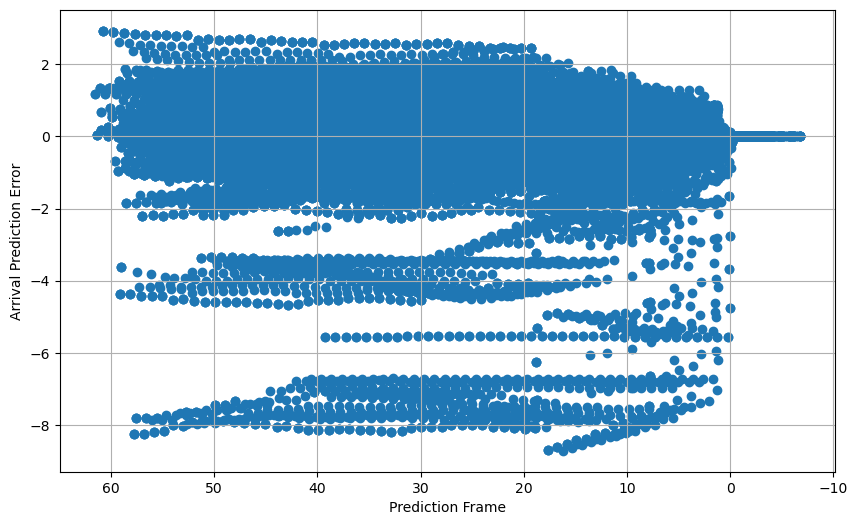

In [61]:
color_map = {'Blue': 'blue', 'Red': 'red', 'Mattapan': 'red',}
colors = df['Route ID'].map(color_map)

plt.figure(figsize=(10, 6))
plt.scatter(df['Prediction Frame'], df['Prediction Error'])
plt.ylabel('Arrival Prediction Error')
plt.xlabel('Prediction Frame')
plt.grid(True)
plt.gca().invert_xaxis()
plt.show()

## Determining Accuracy

In [1]:
import api_data_consolidation as adc
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
vehicles_df = adc.aggregate_by_key('data/mbta_v3/2024-06-09', 'vehicles')
predictions_df = adc.aggregate_by_key('data/mbta_v3/2024-06-09', 'predictions')

In [3]:
df = adc.join_dfs(vehicles_df, predictions_df)

In [4]:
df

,Vehicle ID Vehicle,Bearing,Current Status,Current Stop Sequence,Direction ID Vehicle,Latitude,Longitude,Revenue Vehicle,Last Updated,Route ID Vehicle,...,Status,Stop Sequence,Update Type,Route ID Prediction,Stop ID Prediction,Vehicle ID Prediction,Collection Time Prediction,Prediction Error,Absolute Prediction Error,Prediction Frame
520,B-547CC54C,35,STOPPED_AT,80,1,42.39066,-70.99699,REVENUE,2024-06-09 14:14:48-04:00,Blue,...,None,80,MID_TRIP,Blue,70054,B-547CC54C,2024-06-09 14:15:00-04:00,0 days 00:00:00,0 days 00:00:00,-1 days +23:59:48
521,B-547CC54C,35,STOPPED_AT,80,1,42.39066,-70.99699,REVENUE,2024-06-09 14:14:48-04:00,Blue,...,None,80,REVERSE_TRIP,Blue,70054,B-547CC54C,2024-06-09 13:46:00-04:00,-1 days +23:59:46,0 days 00:00:14,0 days 00:28:34
522,B-547CC54C,35,STOPPED_AT,80,1,42.39066,-70.99699,REVENUE,2024-06-09 14:14:48-04:00,Blue,...,None,80,MID_TRIP,Blue,70054,B-547CC54C,2024-06-09 14:03:00-04:00,-1 days +23:59:08,0 days 00:00:52,0 days 00:10:56
523,B-547CC54C,35,STOPPED_AT,80,1,42.39066,-70.99699,REVENUE,2024-06-09 14:14:48-04:00,Blue,...,None,80,REVERSE_TRIP,Blue,70054,B-547CC54C,2024-06-09 13:50:00-04:00,-1 days +23:59:57,0 days 00:00:03,0 days 00:24:45
524,B-547CC54C,35,STOPPED_AT,80,1,42.39066,-70.99699,REVENUE,2024-06-09 14:14:48-04:00,Blue,...,None,80,REVERSE_TRIP,Blue,70054,B-547CC54C,2024-06-09 13:51:00-04:00,-1 days +23:59:54,0 days 00:00:06,0 days 00:23:42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109732,B-547CC549,275,STOPPED_AT,90,0,42.35889,-71.05740,REVENUE,2024-06-09 20:30:42-04:00,Blue,...,None,90,AT_TERMINAL,Blue,70041,B-547CC549,2024-06-09 20:11:00-04:00,-1 days +23:59:47,0 days 00:00:13,0 days 00:19:29
109733,B-547CC549,275,STOPPED_AT,90,0,42.35889,-71.05740,REVENUE,2024-06-09 20:30:42-04:00,Blue,...,None,90,REVERSE_TRIP,Blue,70041,B-547CC549,2024-06-09 19:38:00-04:00,0 days 00:00:33,0 days 00:00:33,0 days 00:53:15
109734,B-547CC549,275,STOPPED_AT,90,0,42.35889,-71.05740,REVENUE,2024-06-09 20:30:42-04:00,Blue,...,None,90,REVERSE_TRIP,Blue,70041,B-547CC549,2024-06-09 19:59:00-04:00,-1 days +23:59:53,0 days 00:00:07,0 days 00:31:35
109735,B-547CC549,275,STOPPED_AT,90,0,42.35889,-71.05740,REVENUE,2024-06-09 20:30:42-04:00,Blue,...,None,90,MID_TRIP,Blue,70041,B-547CC549,2024-06-09 20:31:00-04:00,0 days 00:00:00,0 days 00:00:00,-1 days +23:59:42


In [5]:
bins = [pd.Timedelta(minutes=0), pd.Timedelta(minutes=3), pd.Timedelta(minutes=6), pd.Timedelta(minutes=10), pd.Timedelta(minutes=15)]
labels = ['0-3 min', '3-6 min', '6-10 min', '10-15 min']
df['Bucket'] = pd.cut(df['Prediction Frame'], bins=bins, labels=labels, include_lowest=True)

In [6]:
df

,Vehicle ID Vehicle,Bearing,Current Status,Current Stop Sequence,Direction ID Vehicle,Latitude,Longitude,Revenue Vehicle,Last Updated,Route ID Vehicle,...,Stop Sequence,Update Type,Route ID Prediction,Stop ID Prediction,Vehicle ID Prediction,Collection Time Prediction,Prediction Error,Absolute Prediction Error,Prediction Frame,Bucket
520,B-547CC54C,35,STOPPED_AT,80,1,42.39066,-70.99699,REVENUE,2024-06-09 14:14:48-04:00,Blue,...,80,MID_TRIP,Blue,70054,B-547CC54C,2024-06-09 14:15:00-04:00,0 days 00:00:00,0 days 00:00:00,-1 days +23:59:48,NaN
521,B-547CC54C,35,STOPPED_AT,80,1,42.39066,-70.99699,REVENUE,2024-06-09 14:14:48-04:00,Blue,...,80,REVERSE_TRIP,Blue,70054,B-547CC54C,2024-06-09 13:46:00-04:00,-1 days +23:59:46,0 days 00:00:14,0 days 00:28:34,NaN
522,B-547CC54C,35,STOPPED_AT,80,1,42.39066,-70.99699,REVENUE,2024-06-09 14:14:48-04:00,Blue,...,80,MID_TRIP,Blue,70054,B-547CC54C,2024-06-09 14:03:00-04:00,-1 days +23:59:08,0 days 00:00:52,0 days 00:10:56,10-15 min
523,B-547CC54C,35,STOPPED_AT,80,1,42.39066,-70.99699,REVENUE,2024-06-09 14:14:48-04:00,Blue,...,80,REVERSE_TRIP,Blue,70054,B-547CC54C,2024-06-09 13:50:00-04:00,-1 days +23:59:57,0 days 00:00:03,0 days 00:24:45,NaN
524,B-547CC54C,35,STOPPED_AT,80,1,42.39066,-70.99699,REVENUE,2024-06-09 14:14:48-04:00,Blue,...,80,REVERSE_TRIP,Blue,70054,B-547CC54C,2024-06-09 13:51:00-04:00,-1 days +23:59:54,0 days 00:00:06,0 days 00:23:42,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109732,B-547CC549,275,STOPPED_AT,90,0,42.35889,-71.05740,REVENUE,2024-06-09 20:30:42-04:00,Blue,...,90,AT_TERMINAL,Blue,70041,B-547CC549,2024-06-09 20:11:00-04:00,-1 days +23:59:47,0 days 00:00:13,0 days 00:19:29,NaN
109733,B-547CC549,275,STOPPED_AT,90,0,42.35889,-71.05740,REVENUE,2024-06-09 20:30:42-04:00,Blue,...,90,REVERSE_TRIP,Blue,70041,B-547CC549,2024-06-09 19:38:00-04:00,0 days 00:00:33,0 days 00:00:33,0 days 00:53:15,NaN
109734,B-547CC549,275,STOPPED_AT,90,0,42.35889,-71.05740,REVENUE,2024-06-09 20:30:42-04:00,Blue,...,90,REVERSE_TRIP,Blue,70041,B-547CC549,2024-06-09 19:59:00-04:00,-1 days +23:59:53,0 days 00:00:07,0 days 00:31:35,NaN
109735,B-547CC549,275,STOPPED_AT,90,0,42.35889,-71.05740,REVENUE,2024-06-09 20:30:42-04:00,Blue,...,90,MID_TRIP,Blue,70041,B-547CC549,2024-06-09 20:31:00-04:00,0 days 00:00:00,0 days 00:00:00,-1 days +23:59:42,NaN


In [7]:
lower_bound_dict = {
    '0-3 min': pd.Timedelta('-00:00:30'),
    '3-6 min': pd.Timedelta('-00:01:00'),
    '6-10 min': pd.Timedelta('-00:01:00'),
    '10-15 min': pd.Timedelta('-00:01:30')
}
upper_bound_dict = {
    '0-3 min': pd.Timedelta('00:01:30'),
    '3-6 min': pd.Timedelta('00:02:30'),
    '6-10 min': pd.Timedelta('00:03:30'),
    '10-15 min': pd.Timedelta('00:04:30')
}

In [9]:
df['Lower Tolerance'] = df['Bucket'].map(lower_bound_dict)
df['Upper Tolerance'] = df['Bucket'].map(upper_bound_dict)

In [10]:
df

,Vehicle ID Vehicle,Bearing,Current Status,Current Stop Sequence,Direction ID Vehicle,Latitude,Longitude,Revenue Vehicle,Last Updated,Route ID Vehicle,...,Route ID Prediction,Stop ID Prediction,Vehicle ID Prediction,Collection Time Prediction,Prediction Error,Absolute Prediction Error,Prediction Frame,Bucket,Lower Tolerance,Upper Tolerance
520,B-547CC54C,35,STOPPED_AT,80,1,42.39066,-70.99699,REVENUE,2024-06-09 14:14:48-04:00,Blue,...,Blue,70054,B-547CC54C,2024-06-09 14:15:00-04:00,0 days 00:00:00,0 days 00:00:00,-1 days +23:59:48,NaN,NaT,NaT
521,B-547CC54C,35,STOPPED_AT,80,1,42.39066,-70.99699,REVENUE,2024-06-09 14:14:48-04:00,Blue,...,Blue,70054,B-547CC54C,2024-06-09 13:46:00-04:00,-1 days +23:59:46,0 days 00:00:14,0 days 00:28:34,NaN,NaT,NaT
522,B-547CC54C,35,STOPPED_AT,80,1,42.39066,-70.99699,REVENUE,2024-06-09 14:14:48-04:00,Blue,...,Blue,70054,B-547CC54C,2024-06-09 14:03:00-04:00,-1 days +23:59:08,0 days 00:00:52,0 days 00:10:56,10-15 min,-1 days +23:58:30,0 days 00:04:30
523,B-547CC54C,35,STOPPED_AT,80,1,42.39066,-70.99699,REVENUE,2024-06-09 14:14:48-04:00,Blue,...,Blue,70054,B-547CC54C,2024-06-09 13:50:00-04:00,-1 days +23:59:57,0 days 00:00:03,0 days 00:24:45,NaN,NaT,NaT
524,B-547CC54C,35,STOPPED_AT,80,1,42.39066,-70.99699,REVENUE,2024-06-09 14:14:48-04:00,Blue,...,Blue,70054,B-547CC54C,2024-06-09 13:51:00-04:00,-1 days +23:59:54,0 days 00:00:06,0 days 00:23:42,NaN,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109732,B-547CC549,275,STOPPED_AT,90,0,42.35889,-71.05740,REVENUE,2024-06-09 20:30:42-04:00,Blue,...,Blue,70041,B-547CC549,2024-06-09 20:11:00-04:00,-1 days +23:59:47,0 days 00:00:13,0 days 00:19:29,NaN,NaT,NaT
109733,B-547CC549,275,STOPPED_AT,90,0,42.35889,-71.05740,REVENUE,2024-06-09 20:30:42-04:00,Blue,...,Blue,70041,B-547CC549,2024-06-09 19:38:00-04:00,0 days 00:00:33,0 days 00:00:33,0 days 00:53:15,NaN,NaT,NaT
109734,B-547CC549,275,STOPPED_AT,90,0,42.35889,-71.05740,REVENUE,2024-06-09 20:30:42-04:00,Blue,...,Blue,70041,B-547CC549,2024-06-09 19:59:00-04:00,-1 days +23:59:53,0 days 00:00:07,0 days 00:31:35,NaN,NaT,NaT
109735,B-547CC549,275,STOPPED_AT,90,0,42.35889,-71.05740,REVENUE,2024-06-09 20:30:42-04:00,Blue,...,Blue,70041,B-547CC549,2024-06-09 20:31:00-04:00,0 days 00:00:00,0 days 00:00:00,-1 days +23:59:42,NaN,NaT,NaT


In [11]:
df['Accurate'] = (df['Prediction Error']>=df['Lower Tolerance']) & (df['Prediction Error']<=df['Upper Tolerance'])

In [12]:
df

,Vehicle ID Vehicle,Bearing,Current Status,Current Stop Sequence,Direction ID Vehicle,Latitude,Longitude,Revenue Vehicle,Last Updated,Route ID Vehicle,...,Stop ID Prediction,Vehicle ID Prediction,Collection Time Prediction,Prediction Error,Absolute Prediction Error,Prediction Frame,Bucket,Lower Tolerance,Upper Tolerance,Accurate
520,B-547CC54C,35,STOPPED_AT,80,1,42.39066,-70.99699,REVENUE,2024-06-09 14:14:48-04:00,Blue,...,70054,B-547CC54C,2024-06-09 14:15:00-04:00,0 days 00:00:00,0 days 00:00:00,-1 days +23:59:48,NaN,NaT,NaT,False
521,B-547CC54C,35,STOPPED_AT,80,1,42.39066,-70.99699,REVENUE,2024-06-09 14:14:48-04:00,Blue,...,70054,B-547CC54C,2024-06-09 13:46:00-04:00,-1 days +23:59:46,0 days 00:00:14,0 days 00:28:34,NaN,NaT,NaT,False
522,B-547CC54C,35,STOPPED_AT,80,1,42.39066,-70.99699,REVENUE,2024-06-09 14:14:48-04:00,Blue,...,70054,B-547CC54C,2024-06-09 14:03:00-04:00,-1 days +23:59:08,0 days 00:00:52,0 days 00:10:56,10-15 min,-1 days +23:58:30,0 days 00:04:30,True
523,B-547CC54C,35,STOPPED_AT,80,1,42.39066,-70.99699,REVENUE,2024-06-09 14:14:48-04:00,Blue,...,70054,B-547CC54C,2024-06-09 13:50:00-04:00,-1 days +23:59:57,0 days 00:00:03,0 days 00:24:45,NaN,NaT,NaT,False
524,B-547CC54C,35,STOPPED_AT,80,1,42.39066,-70.99699,REVENUE,2024-06-09 14:14:48-04:00,Blue,...,70054,B-547CC54C,2024-06-09 13:51:00-04:00,-1 days +23:59:54,0 days 00:00:06,0 days 00:23:42,NaN,NaT,NaT,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109732,B-547CC549,275,STOPPED_AT,90,0,42.35889,-71.05740,REVENUE,2024-06-09 20:30:42-04:00,Blue,...,70041,B-547CC549,2024-06-09 20:11:00-04:00,-1 days +23:59:47,0 days 00:00:13,0 days 00:19:29,NaN,NaT,NaT,False
109733,B-547CC549,275,STOPPED_AT,90,0,42.35889,-71.05740,REVENUE,2024-06-09 20:30:42-04:00,Blue,...,70041,B-547CC549,2024-06-09 19:38:00-04:00,0 days 00:00:33,0 days 00:00:33,0 days 00:53:15,NaN,NaT,NaT,False
109734,B-547CC549,275,STOPPED_AT,90,0,42.35889,-71.05740,REVENUE,2024-06-09 20:30:42-04:00,Blue,...,70041,B-547CC549,2024-06-09 19:59:00-04:00,-1 days +23:59:53,0 days 00:00:07,0 days 00:31:35,NaN,NaT,NaT,False
109735,B-547CC549,275,STOPPED_AT,90,0,42.35889,-71.05740,REVENUE,2024-06-09 20:30:42-04:00,Blue,...,70041,B-547CC549,2024-06-09 20:31:00-04:00,0 days 00:00:00,0 days 00:00:00,-1 days +23:59:42,NaN,NaT,NaT,False


In [18]:
len(df.dropna(subset='Bucket')[df['Accurate']]) / len(df.dropna(subset='Bucket')) * 100

/var/folders/cc/01vgsm2x5mx1t9pzx9p0x9lh0000gn/T/ipykernel_28611/4171309240.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(df.dropna(subset='Bucket')[df['Accurate']]) / len(df.dropna(subset='Bucket')) * 100


93.4141995614035

In [23]:
total_counts = pd.pivot_table(df, 
                              values='Accurate', 
                              index='Route ID Vehicle', 
                              columns='Bucket', 
                              aggfunc='count', 
                              fill_value=0)
accurate_counts = pd.pivot_table(df[df['Accurate']], 
                                 values='Accurate', 
                                 index='Route ID Vehicle', 
                                 columns='Bucket', 
                                 aggfunc='count', 
                                 fill_value=0)
percentage_accurate = accurate_counts / total_counts * 100

In [24]:
percentage_accurate

Bucket,0-3 min,3-6 min,6-10 min,10-15 min
Route ID Vehicle,,,,
Blue,96.30719,96.761269,89.348814,92.808743


In [25]:
percentage_accurate['Average Accuracy'] = percentage_accurate.mean(axis=1)

In [26]:
percentage_accurate

Bucket,0-3 min,3-6 min,6-10 min,10-15 min,Average Accuracy
Route ID Vehicle,,,,,
Blue,96.30719,96.761269,89.348814,92.808743,93.806504


In [27]:
percentage_accurate.mean()

Bucket
0-3 min             96.307190
3-6 min             96.761269
6-10 min            89.348814
10-15 min           92.808743
Average Accuracy    93.806504
dtype: float64

In [28]:
overall_mean = percentage_accurate.mean()
percentage_accurate.loc['Overall'] = overall_mean

In [29]:
percentage_accurate

Bucket,0-3 min,3-6 min,6-10 min,10-15 min,Average Accuracy
Route ID Vehicle,,,,,
Blue,96.30719,96.761269,89.348814,92.808743,93.806504
Overall,96.30719,96.761269,89.348814,92.808743,93.806504


In [34]:
print(percentage_accurate)

Bucket             0-3 min    3-6 min   6-10 min  10-15 min  Average Accuracy
Route ID Vehicle                                                             
Blue              96.30719  96.761269  89.348814  92.808743         93.806504
Overall           96.30719  96.761269  89.348814  92.808743         93.806504


In [42]:
import matplotlib.pyplot as plt

def plot_prediction_error(input_df):
    df = input_df
    df['Prediction Frame'] = df['Prediction Frame'].dt.total_seconds() / 60
    df['Prediction Error'] = df['Prediction Error'].dt.total_seconds() / 60
    df = df[df['Prediction Frame'] > 0]
        
    route_colors = {
        'Blue': '#003DA5',
        'Red': '#DA291C',
        'Mattapan': '#DA291C',
        'Green-B': '#00843D',
        'Green-C': '#00843D',
        'Green-D': '#00843D',
        'Green-E': '#00843D',
        'Orange': '#ED8B00'
    }

    # Ensure the 'Route ID' is treated as a categorical variable
    df['Route ID'] = df['Route ID Vehicle'].astype('category')

    # Map the Route ID to the corresponding colors
    colors = df['Route ID'].map(route_colors)

    fig, ax = plt.subplots(figsize=(10, 6))
    scatter = ax.scatter(df['Prediction Frame'], df['Prediction Error'], c=colors)
    ax.set_ylabel('Arrival Prediction Error')
    ax.set_xlabel('Prediction Frame')
    ax.grid(True)
    ax.invert_xaxis()

    # Create a legend
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in route_colors.values()]
    labels = route_colors.keys()
    ax.legend(handles, labels, title="Route")

    return fig

/var/folders/cc/01vgsm2x5mx1t9pzx9p0x9lh0000gn/T/ipykernel_28611/2049871558.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Route ID'] = df['Route ID Vehicle'].astype('category')


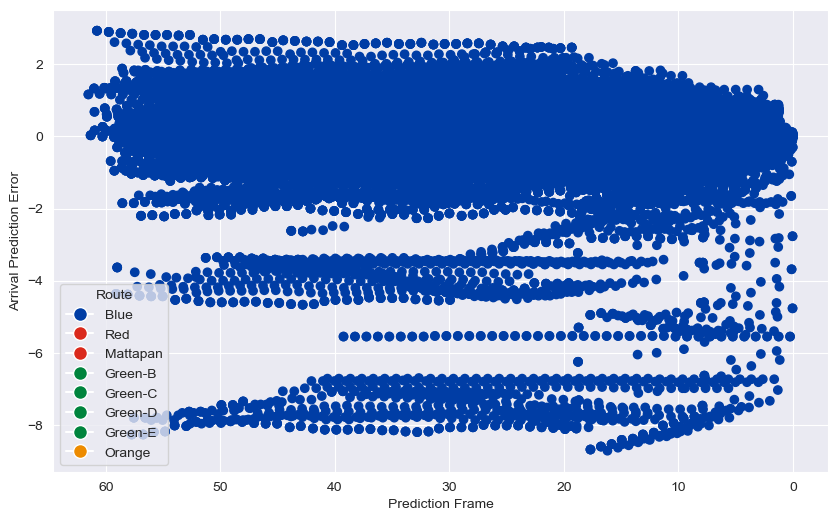

In [43]:
fig = plot_prediction_error(df)